In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
import numpy as np


In [2]:
((X_train, Y_train),(x_test, y_test))=mnist.load_data()

In [3]:
X_train=X_train.reshape((X_train.shape[0], -1))
x_test=x_test.reshape((x_test.shape[0], -1))
X_train=X_train/255.0
x_test=x_test/255.0

In [4]:
lb=LabelBinarizer()

Y_train=lb.fit_transform(Y_train)
y_test=lb.transform(y_test)

In [5]:
model=Sequential()
model.add(Dense(128, input_shape=(784,),activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
sgd=SGD(0.01)
epochs=11
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H=model.fit(X_train, Y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=128)

Epoch 1/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1505 - loss: 2.3198 - val_accuracy: 0.2214 - val_loss: 2.2448
Epoch 2/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2741 - loss: 2.2318 - val_accuracy: 0.3775 - val_loss: 2.1771
Epoch 3/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4306 - loss: 2.1614 - val_accuracy: 0.4870 - val_loss: 2.0855
Epoch 4/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4823 - loss: 2.0633 - val_accuracy: 0.5446 - val_loss: 1.9623
Epoch 5/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5493 - loss: 1.9345 - val_accuracy: 0.5910 - val_loss: 1.8071
Epoch 6/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6076 - loss: 1.7799 - val_accuracy: 0.6572 - val_loss: 1.6341
Epoch 7/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6562 - loss: 1.6086 - val_accuracy: 0.6873 - val_loss: 1.4606
Epoch 8/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6867 - loss: 1.4401 - val_accuracy: 0.

In [7]:
predictions = model.predict(x_test, batch_size=128)
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       980
           1       0.82      0.99      0.89      1135
           2       0.85      0.77      0.81      1032
           3       0.67      0.85      0.75      1010
           4       0.80      0.65      0.72       982
           5       0.77      0.46      0.57       892
           6       0.83      0.88      0.85       958
           7       0.85      0.86      0.85      1028
           8       0.84      0.61      0.71       974
           9       0.66      0.76      0.71      1009

    accuracy                           0.79     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.79      0.78     10000



[]

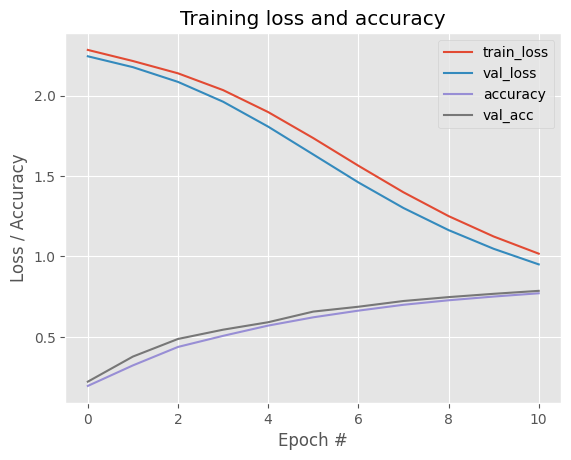

In [8]:
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0,epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,epochs), H.history["accuracy"], label="accuracy")
plt.plot(np.arange(0,epochs), H.history["val_accuracy"], label="val_acc")

plt.title("Training loss and accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss / Accuracy")
plt.legend()
plt.plot()